### LOGISTIC REGRESSION WITH GRADIENT DESCENT(Iris.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

#### getting dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
#here y is already encoded, to get the species name, use target_names attribute of the loaded dataset.
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
<class 'numpy.ndarray'>
<class 'numpy.nd

#### feature scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#### visualising actual dataset

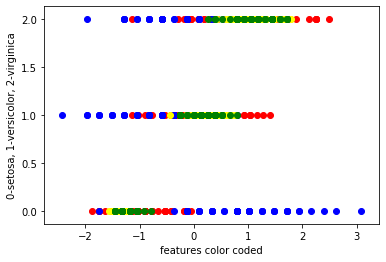

In [4]:
#scatter plot of all features wrt species type
plt.scatter(X[:, 0], y, color='red')
plt.scatter(X[:, 1], y, color='blue')
plt.scatter(X[:, 2], y, color='yellow')
plt.scatter(X[:, 3], y, color='green')
plt.ylabel("0-{}, 1-{}, 2-{}".format(iris.target_names[0], iris.target_names[1], iris.target_names[2]))
plt.xlabel("features color coded")
plt.show()

#### reshaping X and y, and making matrices using closed form

In [5]:
rows = X.shape[0]
columns = X.shape[1]
#y has a shape of (150,) i.e 150 rows. to make it explicity a 1d np array, we'll reshape it with cols=1
y = y.reshape(y.shape[0], 1)
print("no. of samples/rows: {}\nno. of input features: {}, namely: {}".format(rows, columns, iris.feature_names))
print("X.shape: {}".format(X.shape))
print("y.shape: {}\n".format(y.shape))

ones = np.ones((rows, 1))

#adding this ones column to X
X = np.concatenate((ones, X), axis=1)
#for updated X, first col of 1s represents x0 i.e 1(coef of intercept), 
#2nd, 3rd, 4th, 5th col represent coefs of sepal length (cm)(x1), sepal width (cm)(x2), petal length (cm)(x3) and petal width(cm)(x4) respectively
#no. columns gets updated by 1
columns = X.shape[1]

no. of samples/rows: 150
no. of input features: 4, namely: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X.shape: (150, 4)
y.shape: (150, 1)



#### defining learning rate and epochs

In [6]:
a = 0.1
epochs = 100

#### checking for missing values

In [7]:
if pd.isnull(df).values.any() == True:
    print('missing values exist')
else:
    print('no missing values')

no missing values


#### splitting into train and test data (70/30)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 5) (105, 1)
(45, 5) (45, 1)


#### function for calculating the hypothesis function for logistic regression

In [9]:
def getHypothesisF(z):
    return (1/(1+np.exp(-z)))

#### function for calculating cost

In [10]:
def getCost(y, y_pred):
    cost = y*np.log(y_pred) + (1-y)*np.log(1-y_pred)
    J = (-1/y.shape[0])*sum(cost)
    return J.round(6)

#### confusion matrix

In [11]:
# def plotCM(_y, y_pred, enc):
#     cm = confusion_matrix(_y, y_pred)
#     cm
#     plt.figure(figsize = (7, 7))
#     sns.set(font_scale=1.4) # for label size
#     cm_hm = sns.heatmap(cm, annot=True)
#     bottom, top = cm_hm.get_ylim()
#     cm_hm.set_ylim(bottom + 0.5, top - 0.5)
#     plt.xlabel('Predicted Species')
#     plt.ylabel('Actual Species')
#     plt.show()


#### function for performing logistic regression with gradient descent

In [12]:
def logisticRegressionWithGD(X_train, y_train, epochs, a, columns, rows, enc):
    
    #one v/s rest, setting the current target label as 1 else 0 to represent rest
    _y = np.where(y_train == enc, 1, 0)
    
    theta = np.zeros((columns, 1))
    accuracy_train = np.empty([epochs])
    cost_train = np.empty([epochs])
    
    for i in range(epochs):
        print("\nITERATION {}\n\n".format(i))
        #getting the hypothesis
        print("\tcurrent theta: {}\n\n".format(theta.T))
        y_pred = getHypothesisF(X_train.dot(theta))
        
        #classfying the labels
        y_label = np.where(y_pred >= 0.5, 1, 0)
        
        #calculating the cost associated with current prediction
        cost_train[i] = getCost(_y, y_pred)
        print("\tcost: {}\n".format(cost_train[i]))
        
        #getting the accuracy for current prediction
        difference = y_pred - _y
        accuracy_train[i] = 1 - (sum(difference)/rows)
        
        #improving on coefs for next iteration
        theta = theta - a*((((difference.T).dot(X_train))/rows).T)
        
#         plotCM(_y, y_label, enc)
        
    return (y_label, accuracy_train, cost_train)
        

#### training 3 binary classifiers (One v/s rest)

In [13]:
columns = X_train.shape[1]
rows = X_train.shape[0]
print("\n\n\nsetosa V/s rest\n\n")
y_label_train_0, accuracy_train_0, cost_train_0 = logisticRegressionWithGD(X_train, y_train, epochs, a, columns, rows, 0)
print("\n\n\nversicolor V/s rest\n\n")
y_label_train_1, accuracy_train_1, cost_train_1 = logisticRegressionWithGD(X_train, y_train, epochs, a, columns, rows, 1)
print("\n\n\nvirginica V/s rest\n\n")
y_label_train_2, accuracy_train_2, cost_train_2 = logisticRegressionWithGD(X_train, y_train, epochs, a, columns, rows, 2)




setosa V/s rest



ITERATION 0


	current theta: [[0. 0. 0. 0. 0.]]


	cost: 0.693147


ITERATION 1


	current theta: [[-0.01571429 -0.03304421  0.03013605 -0.04373396 -0.04238682]]


	cost: 0.635688


ITERATION 2


	current theta: [[-0.03112932 -0.06340255  0.05845024 -0.08426366 -0.08165939]]


	cost: 0.586021


ITERATION 3


	current theta: [[-0.04624496 -0.09130804  0.08508823 -0.12185982 -0.11808077]]


	cost: 0.542968


ITERATION 4


	current theta: [[-0.06106137 -0.11699369  0.11019638 -0.15679242 -0.15191291]]


	cost: 0.505497


ITERATION 5


	current theta: [[-0.07557982 -0.14068204  0.13391512 -0.1893191  -0.18340567]]


	cost: 0.472728


ITERATION 6


	current theta: [[-0.08980291 -0.16257917  0.15637507 -0.21967864 -0.21279061]]


	cost: 0.443918


ITERATION 7


	current theta: [[-0.10373458 -0.18287204  0.17769527 -0.24808803 -0.24027818]]


	cost: 0.418452


ITERATION 8


	current theta: [[-0.11737996 -0.20172798  0.19798276 -0.27474193 -0.26605731]]


	cost: 0.395818

	cost: 0.273228



#### predicting for test set using the trained classfiers

In [14]:
columns = X_test.shape[1]
rows = X_test.shape[0]
print("\n\n\nsetosa V/s rest\n\n")
y_label_test_0, accuracy_test_0, cost_test_0 = logisticRegressionWithGD(X_test, y_test, epochs, a, columns, rows, 0)
print("\n\n\nversicolor V/s rest\n\n")
y_label_test_1, accuracy_test_1, cost_test_1 = logisticRegressionWithGD(X_test, y_test, epochs, a, columns, rows, 1)
print("\n\n\nvirginica V/s rest\n\n")
y_label_test_2, accuracy_test_2, cost_test_2 = logisticRegressionWithGD(X_test, y_test, epochs, a, columns, rows, 2)




setosa V/s rest



ITERATION 0


	current theta: [[0. 0. 0. 0. 0.]]


	cost: 0.693147


ITERATION 1


	current theta: [[-0.01888889 -0.03562784  0.02448953 -0.04295268 -0.04053004]]


	cost: 0.637965


ITERATION 2


	current theta: [[-0.03711228 -0.06842829  0.04768006 -0.08292382 -0.07817532]]


	cost: 0.590031


ITERATION 3


	current theta: [[-0.05470533 -0.09864108  0.06966335 -0.12015818 -0.11317223]]


	cost: 0.548284


ITERATION 4


	current theta: [[-0.07170538 -0.12650768  0.09053195 -0.15490107 -0.14575759]]


	cost: 0.511787


ITERATION 5


	current theta: [[-0.08814987 -0.15225987  0.11037533 -0.18738765 -0.17615849]]


	cost: 0.479735


ITERATION 6


	current theta: [[-0.10407486 -0.17611298  0.12927748 -0.21783656 -0.2045862 ]]


	cost: 0.451445


ITERATION 7


	current theta: [[-0.11951424 -0.19826281  0.14731577 -0.24644704 -0.2312335 ]]


	cost: 0.426347


ITERATION 8


	current theta: [[-0.13449938 -0.21888492  0.16456059 -0.27339826 -0.25627393]]


	cost: 0.403965

#### plotting accuracy and cost graphs

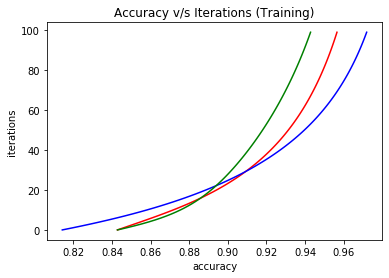

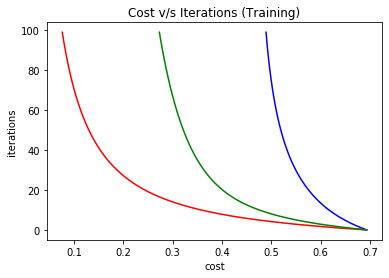

In [15]:

plt.plot(accuracy_train_0, range(epochs), color='red')
plt.plot(accuracy_train_1, range(epochs), color='blue')
plt.plot(accuracy_train_2, range(epochs), color='green')
plt.xlabel("accuracy")
plt.ylabel("iterations")
plt.title("Accuracy v/s Iterations (Training)")
plt.show()

plt.plot(cost_train_0, range(epochs), color='red')
plt.plot(cost_train_1, range(epochs), color='blue')
plt.plot(cost_train_2, range(epochs), color='green')
plt.xlabel("cost")
plt.ylabel("iterations")
plt.title("Cost v/s Iterations (Training)")
plt.show()

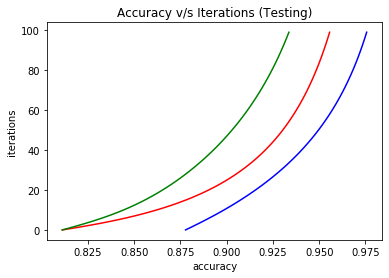

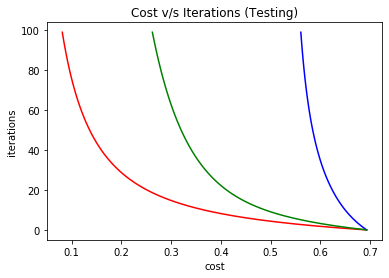

In [16]:

plt.plot(accuracy_test_0, range(epochs), color='red')
plt.plot(accuracy_test_1, range(epochs), color='blue')
plt.plot(accuracy_test_2, range(epochs), color='green')
plt.xlabel("accuracy")
plt.ylabel("iterations")
plt.title("Accuracy v/s Iterations (Testing)")
plt.show()

plt.plot(cost_test_0, range(epochs), color='red')
plt.plot(cost_test_1, range(epochs), color='blue')
plt.plot(cost_test_2, range(epochs), color='green')
plt.xlabel("cost")
plt.ylabel("iterations")
plt.title("Cost v/s Iterations (Testing)")
plt.show()

#### classifying each sample using all 3 classifiers

In [48]:
from sklearn.metrics import accuracy_score
import random
#we'll calculate accuracy for each of the samples in testing set, for each of the 3 classifiers.
accuracy_test = np.empty([X_test.shape[0]])
y_label = np.empty([X_test.shape[0]])
for i in range(X_test.shape[0]):
    #label from setosa v/s rest classifier
    clfr0_label = y_label_test_0[i];
    #label from versicolor v/s rest classifier
    clfr1_label = y_label_test_1[i];
    #label from virginica v/s rest classifier
    clfr2_label = y_label_test_2[i];
    
#    y_label[i] = clfr0_label*0 + clfr1_label*1 + clfr2_label*2

    #if the ith sample is classified as more than 1 class, the we need to discard one of the classes.
    #we can either have a default class for these cases, or we can randomly choose one of the triggered classes.
    if(clfr1_label == 1):
        y_label[i] = 1
        if(clfr2_label == 1):
            y_label[i] = random.choice([1,2])
        if(clfr0_label == 1):
            y_label[i] = random.choice([1,0])
    elif(clfr0_label == 1):
        y_label[i] = 0
        if(clfr2_label == 1):
            y_label[i] = random.choice([0,2])
    elif(clfr2_label == 1):
        y_label[i] = 2
    y_label[i] = int(y_label[i])
    #accuracy_test[i] = max(accuracy_score(y_test[i], clfr0_label), accuracy_score(y_test[i], clfr1_label*1), accuracy_score(y_test[i], clfr2_label*2))
    #print("{} : {}".format(y_test[i],int(y_label[i])))
    
accuracy_test = accuracy_score(y_test, y_label)
print("accuracy gained using 3 one v/s rest classifiers: {}".format(accuracy_test))

accuracy gained using 3 one v/s rest classifiers: 0.9111111111111111
